# Naïve Bayes algorithm on the Titanic dataset

# Homework8_Group4

- Deekshitha Gona Id: 2399282
- Yuzhen Hu  Id: 2299391
- Jayaprakash Yadav Guntumani Id: 2391724
- Aakanksha Govindaraju Id: 2384001
- George Dani Id: 1844097

Homework 8

Part I: Explain Laplace smoothing (for example, see reference [1]).

Part II: Build a Naïve Bayes algorithm on the Titanic dataset (attached to OneDrive) to predict whether a passenger survived or not.

This dataset provides information on the fate of passengers on the fatal maiden voyage of the ocean liner "Titanic", summarized according to survival (target variable with 1=survived and 0=died) and explanatory variables: Name, Pclass (passenger class), Sex, Age, SibSp (total number of siblings including the spouse traveling with the passenger), Parch (total number of parents and children traveling with the passenger), Ticket, Fare, Cabin, and Embarked (where the traveler mounted from: Southampton, Cherbourg, or Queenstown).

Tasks:

Import the dataset into a pandas DataFrame.

Split the data into training and test sets.

Select one or more explanatory variables you would like to use.

Check for any missing values in the explanatory variables you want to use and either delete those passengers from the dataset or fill in the missing values.

If a numerical variable has missing values, fill those in with the average or median of that variable.

If a categorical variable has missing values, fill those in using the most common value.

You can create your own script for missing values or use sklearn.SimpleImputer.

Convert the categorical variables to numerical values using encoding.

You can create your own script or use sklearn.LabelEncoder.

Build a model on the training data.

You can create your own code or use sklearn.NaïveBayes.

If you use a mix of continuous and categorical explanatory variables, consider how to best build the model.

Inspect the evaluation measures (accuracy score, confusion matrix, classification report).

Use some values for the explanatory variables to make predictions with your model, determining if that person would have survived or not.






**Part I: Explain Laplace smoothing (for example, see reference [1]).**

Laplace smoothing is a technique used in probability models like Naive Bayes to avoid zero probabilities for events not seen in the training data. When a word or feature doesn’t appear in the training set for a particular class, the model might assign it a probability of zero, making it overly confident that this event is impossible.

With Laplace smoothing, we add a small constant (usually 1) to each count, so every event has a minimal non-zero probability. For example, instead of estimating the probability of a word given a class as:

$$
\phi_j = \frac{\text{count of word j in class}}{\text{total words in class}}
$$

we estimate it as:

$$
\phi_j = \frac{1 + \text{count of word j in class}}{\text{vocabulary size} + \text{total words in class}}
$$

This ensures that no probability is zero, making the model more robust to new data with previously unseen words or features.

---




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [3]:

# Load the datasets
gender_submission = pd.read_csv('/content/drive/MyDrive/ML/Homeworks/titanic/gender_submission.csv')  # This contains submission format and gender-based predictions
train_df = pd.read_csv('/content/drive/MyDrive/ML/Homeworks/titanic/train.csv')  # Training dataset
test_df = pd.read_csv('/content/drive/MyDrive/ML/Homeworks/titanic/test.csv')    # Test dataset

# Display the first few rows of each dataset to understand their structure
print("Gender Submission Data:\n", gender_submission.head())
print("Training Data:\n", train_df.head())
print("Test Data:\n", test_df.head())



Gender Submission Data:
    PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
Training Data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17

In [30]:

# Select relevant features for EDA and modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
df_eda = train_df[features]

# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding
df_eda = pd.get_dummies(df_eda, columns=['Sex', 'Embarked'], dummy_na=False)

# Handle missing values (replace with mean for Age)
df_eda['Age'].fillna(df_eda['Age'].median(), inplace=True)




<ipython-input-30-cc048b62359d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['Age'].fillna(df_eda['Age'].median(), inplace=True)


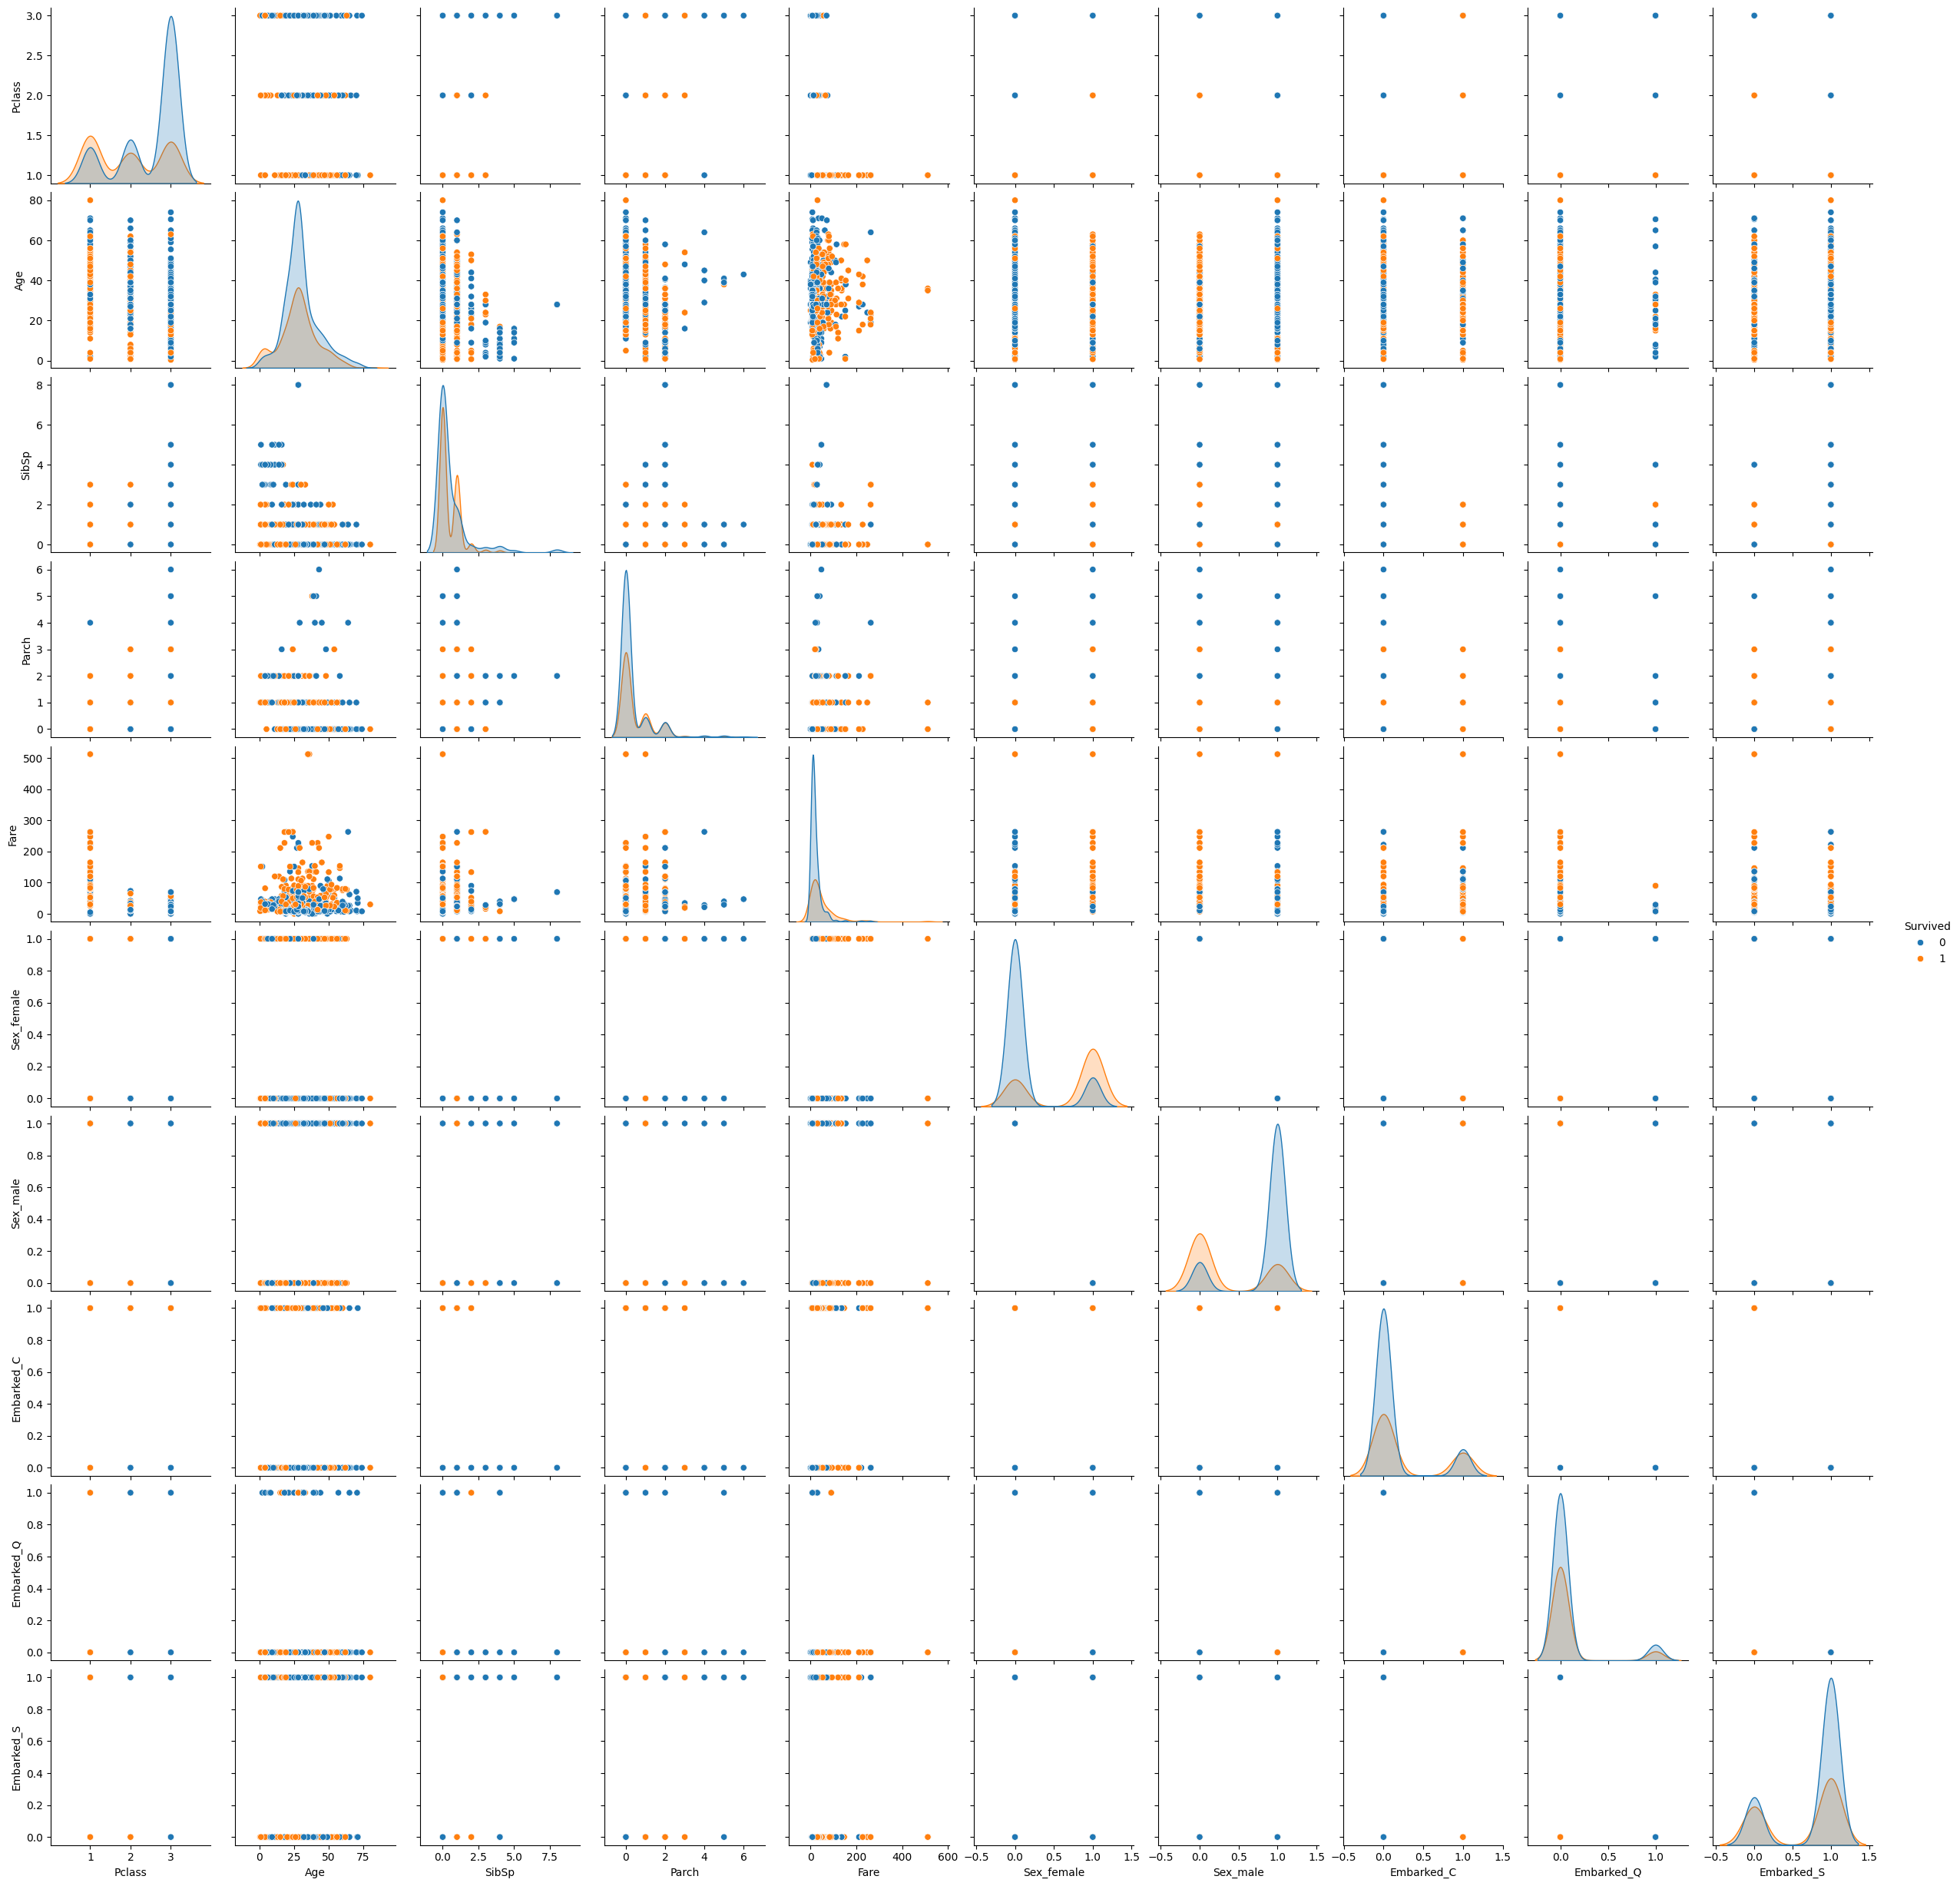

In [32]:
# Explore relationships between variables
sns.pairplot(df_eda, hue='Survived')
plt.show()



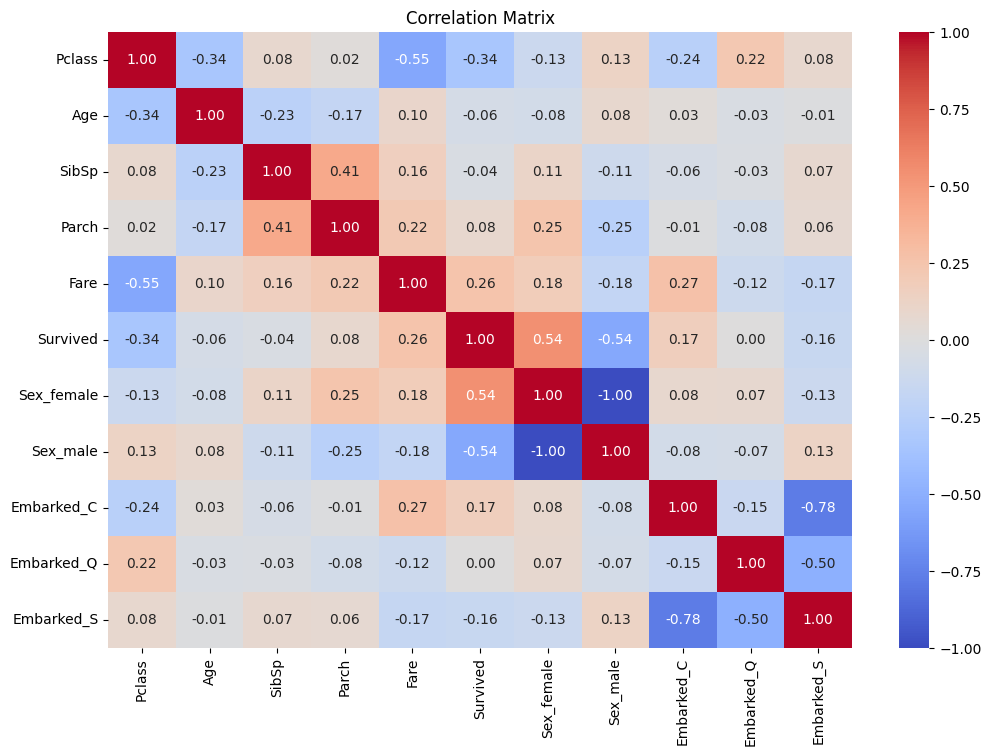

In [33]:
# Correlation matrix and heatmap
correlation_matrix = df_eda.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



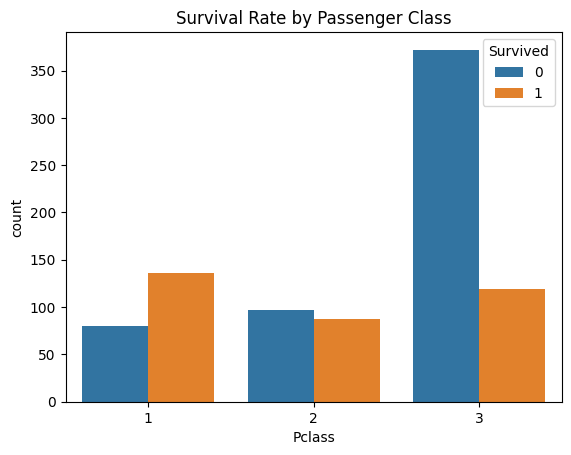

In [34]:

sns.countplot(x='Pclass', hue='Survived', data=df_eda)
plt.title('Survival Rate by Passenger Class')
plt.show()



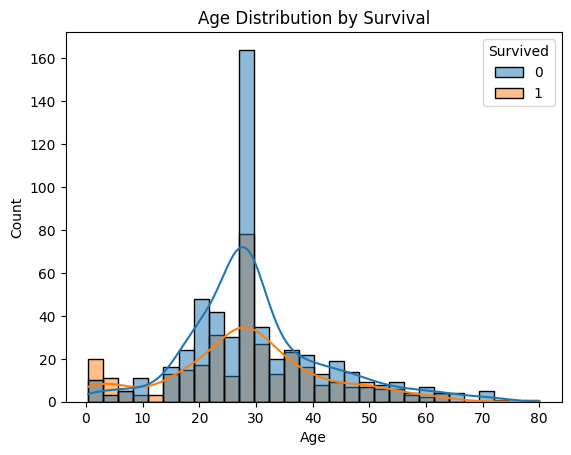

In [35]:

sns.histplot(x='Age', hue='Survived', data=df_eda, kde=True)
plt.title('Age Distribution by Survival')
plt.show()



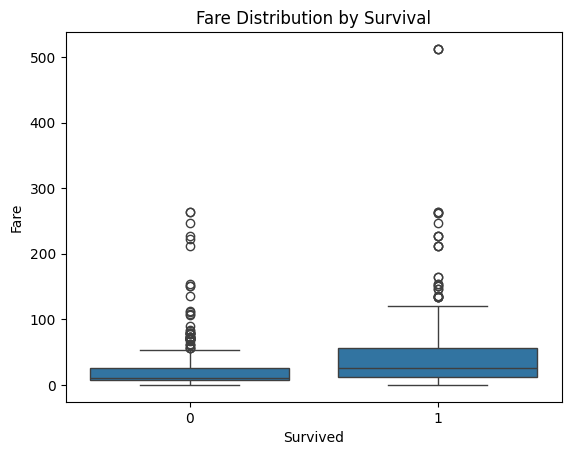

In [36]:
# Box plots can also be helpful
sns.boxplot(x='Survived', y='Fare', data=df_eda)
plt.title('Fare Distribution by Survival')
plt.show()


<ipython-input-37-0308fd859f6e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_eda[df_eda['Survived'] == 1]['Fare'], label='Survived', shade=True)
<ipython-input-37-0308fd859f6e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_eda[df_eda['Survived'] == 0]['Fare'], label='Not Survived', shade=True)


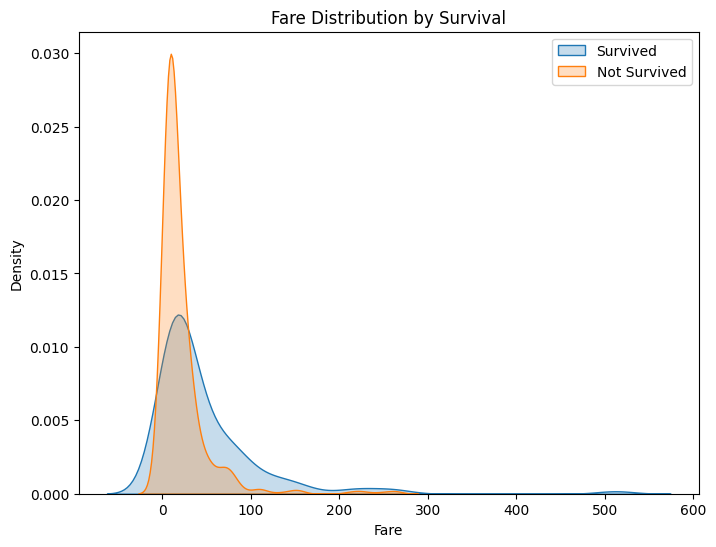

In [37]:


# Analyze the distribution of Fare for those who survived and those who didn't
plt.figure(figsize=(8, 6))
sns.kdeplot(df_eda[df_eda['Survived'] == 1]['Fare'], label='Survived', shade=True)
sns.kdeplot(df_eda[df_eda['Survived'] == 0]['Fare'], label='Not Survived', shade=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()




In [38]:
# You can also calculate some statistics to compare Fare for survived vs. not survived
survived_fare = df_eda[df_eda['Survived'] == 1]['Fare']
not_survived_fare = df_eda[df_eda['Survived'] == 0]['Fare']
print("Mean Fare for Survived:", survived_fare.mean())
print("Mean Fare for Not Survived:", not_survived_fare.mean())
print("Median Fare for Survived:", survived_fare.median())
print("Median Fare for Not Survived:", not_survived_fare.median())




Mean Fare for Survived: 48.39540760233918
Mean Fare for Not Survived: 22.117886885245902
Median Fare for Survived: 26.0
Median Fare for Not Survived: 10.5


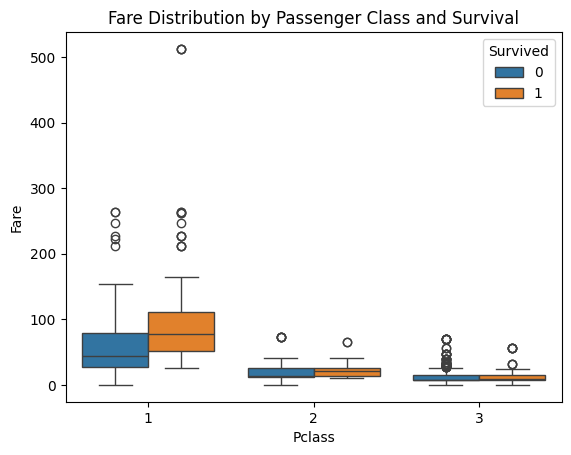

In [39]:

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df_eda)
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()

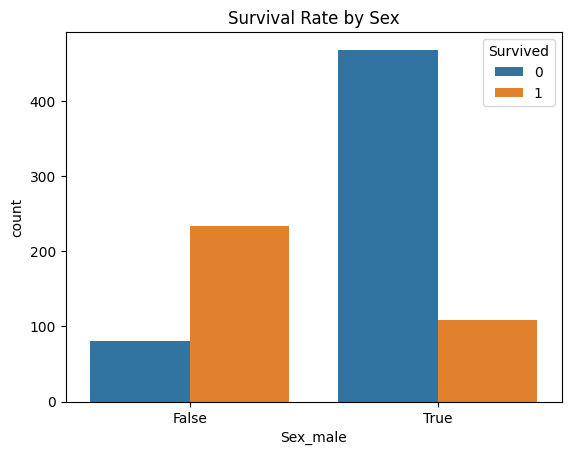

In [40]:


sns.countplot(x='Sex_male', hue='Survived', data=df_eda)
plt.title('Survival Rate by Sex')
plt.show()

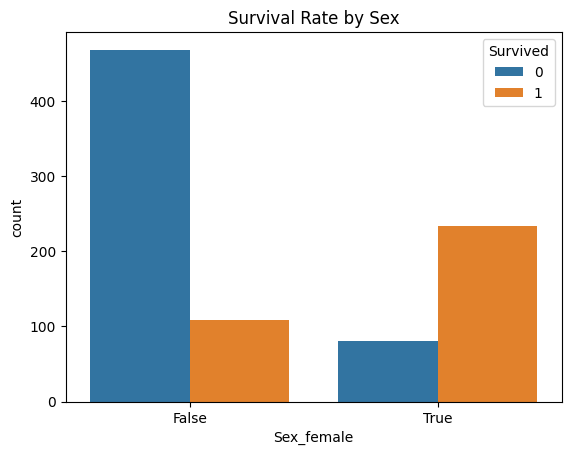

In [41]:
sns.countplot(x='Sex_female', hue='Survived', data=df_eda)
plt.title('Survival Rate by Sex')
plt.show()

In [44]:
from sklearn.impute import SimpleImputer


# Selecting features and target for training data
X = train_df[['Pclass', 'Sex', 'Age', 'Embarked','Fare']] # Explanatory variables
y = train_df['Survived']  # Target variable

# Check for missing values in the selected features
print(X.isnull().sum())

# Using SimpleImputer for missing values
imputer_num = SimpleImputer(strategy='median')
X['Age'] = imputer_num.fit_transform(X[['Age']]).ravel()

imputer_cat = SimpleImputer(strategy='most_frequent')
X['Embarked'] = imputer_cat.fit_transform(X[['Embarked']]).ravel()

# Convert 'Sex' and 'Embarked' to numerical using Label Encoding
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])

# Verify that missing values have been handled
print(X.isnull().sum())

Pclass        0
Sex           0
Age         177
Embarked      2
Fare          0
dtype: int64
Pclass      0
Sex         0
Age         0
Embarked    0
Fare        0
dtype: int64


<ipython-input-44-d693a78aa0c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer_num.fit_transform(X[['Age']]).ravel()
<ipython-input-44-d693a78aa0c2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = imputer_cat.fit_transform(X[['Embarked']]).ravel()
<ipython-input-44-d693a78aa0c2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

## Using MultinomialNB

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[92 13]
 [36 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.51      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179



## 73% Accuracy with MultinomialNB

## Using GaussianNB

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[84 21]
 [17 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



## 79% Accuracy with GaussianNB

In [47]:
# Example predictions
new_passenger = pd.DataFrame({'Pclass': [3], 'Sex': [1], 'Age': [25], 'Embarked': [2], 'Fare': [7.25]})
# Replace with actual values for prediction
prediction = model.predict(new_passenger)
print("\nPrediction for new passenger:", prediction)  # 1 for survived, 0 for not survived


Prediction for new passenger: [0]


In [48]:
# Example predictions
new_passenger = pd.DataFrame({'Pclass': [1], 'Sex': [0], 'Age': [25], 'Embarked': [2], 'Fare': [7.25]})
# Replace with actual values for prediction
prediction = model.predict(new_passenger)
print("\nPrediction for new passenger:", prediction)  # 1 for survived, 0 for not survived


Prediction for new passenger: [1]


In [57]:

survived_counts = train_df['Survived'].value_counts()

survived_counts

,count
Survived,
0,549
1,342


## Here we can see that survived class is imbalanced so let's use SMOTE and try to build the model again

In [56]:
from imblearn.over_sampling import SMOTE


# Selecting features and target for training data
X = train_df[['Pclass', 'Sex', 'Age', 'Embarked','Fare']] # Explanatory variables
y = train_df['Survived']  # Target variable

# Check for missing values in the selected features
print(X.isnull().sum())

# Using SimpleImputer for missing values
imputer_num = SimpleImputer(strategy='median')
X['Age'] = imputer_num.fit_transform(X[['Age']]).ravel()

imputer_cat = SimpleImputer(strategy='most_frequent')
X['Embarked'] = imputer_cat.fit_transform(X[['Embarked']]).ravel()

# Convert 'Sex' and 'Embarked' to numerical using Label Encoding
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])

# Verify that missing values have been handled
print(X.isnull().sum())


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Pclass        0
Sex           0
Age         177
Embarked      2
Fare          0
dtype: int64
Pclass      0
Sex         0
Age         0
Embarked    0
Fare        0
dtype: int64
Confusion Matrix:
 [[ 82  21]
 [ 16 101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       103
           1       0.83      0.86      0.85       117

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



<ipython-input-56-1faaf0d27201>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer_num.fit_transform(X[['Age']]).ravel()
<ipython-input-56-1faaf0d27201>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = imputer_cat.fit_transform(X[['Embarked']]).ravel()
<ipython-input-56-1faaf0d27201>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

# As we can see after using SMOTE we got 83% accuracy

## with only 3 features

In [49]:
# Selecting features and target for training data
X = train_df[['Pclass', 'Sex', 'Age']]  # Explanatory variables
y = train_df['Survived']                # Target variable

In [50]:
# Check for missing values in the selected features
print(X.isnull().sum())


Pclass      0
Sex         0
Age       177
dtype: int64


In [51]:
# Fill missing values in 'Age' with the median age
X['Age'].fillna(X['Age'].median(), inplace=True)

# Convert 'Sex' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

# Verify that missing values have been handled
print(X.isnull().sum())

Pclass    0
Sex       0
Age       0
dtype: int64


<ipython-input-51-61ac71b571b4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-51-61ac71b571b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-51-61ac71b571b4>:7: SettingWithCopyWarning: 
A value is trying to be s

In [52]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[83 22]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       105
           1       0.70      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



# Accuracy of 75% with GaussianNB

In [53]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[89 16]
 [49 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.85      0.73       105
           1       0.61      0.34      0.43        74

    accuracy                           0.64       179
   macro avg       0.63      0.59      0.58       179
weighted avg       0.63      0.64      0.61       179



## 64% accuracy with MultinomialNB

### EXTRA EDA

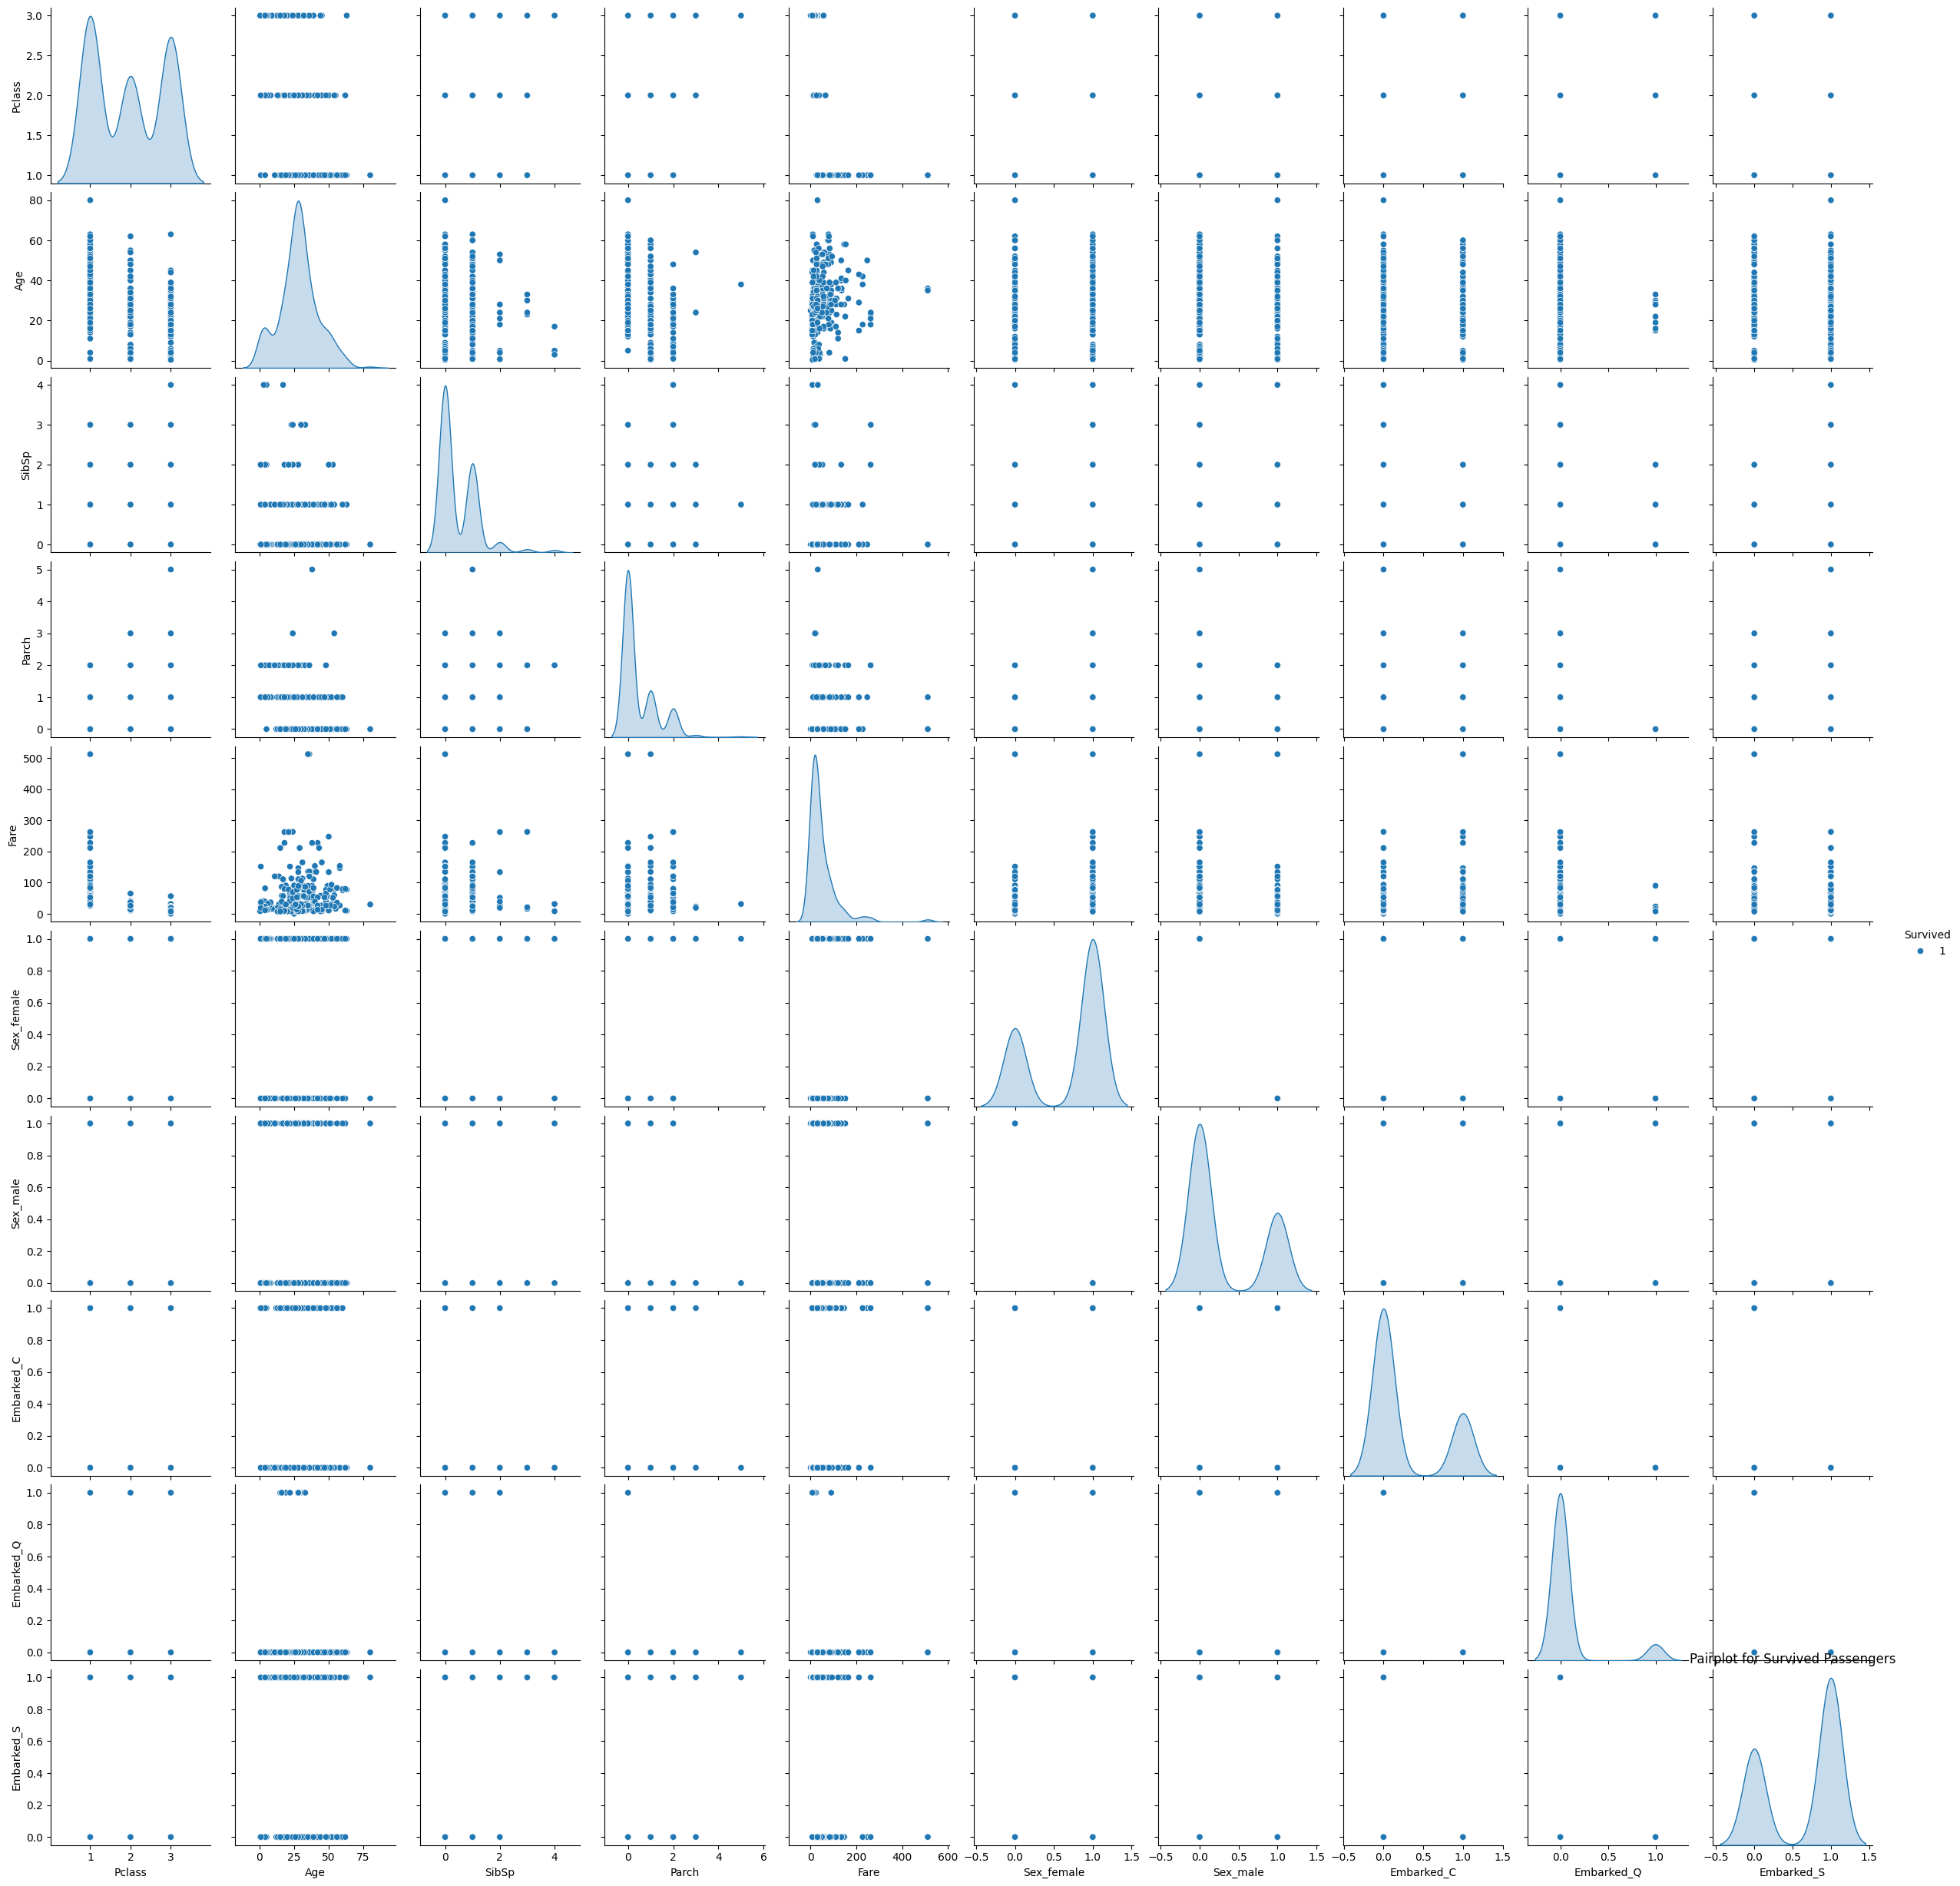

In [17]:

# Separate the data into two DataFrames based on 'Survived'
df_survived = df_eda[df_eda['Survived'] == 1]
df_not_survived = df_eda[df_eda['Survived'] == 0]

# Create pairplots for each group
sns.pairplot(df_survived, hue='Survived')
plt.title('Pairplot for Survived Passengers')
plt.show()



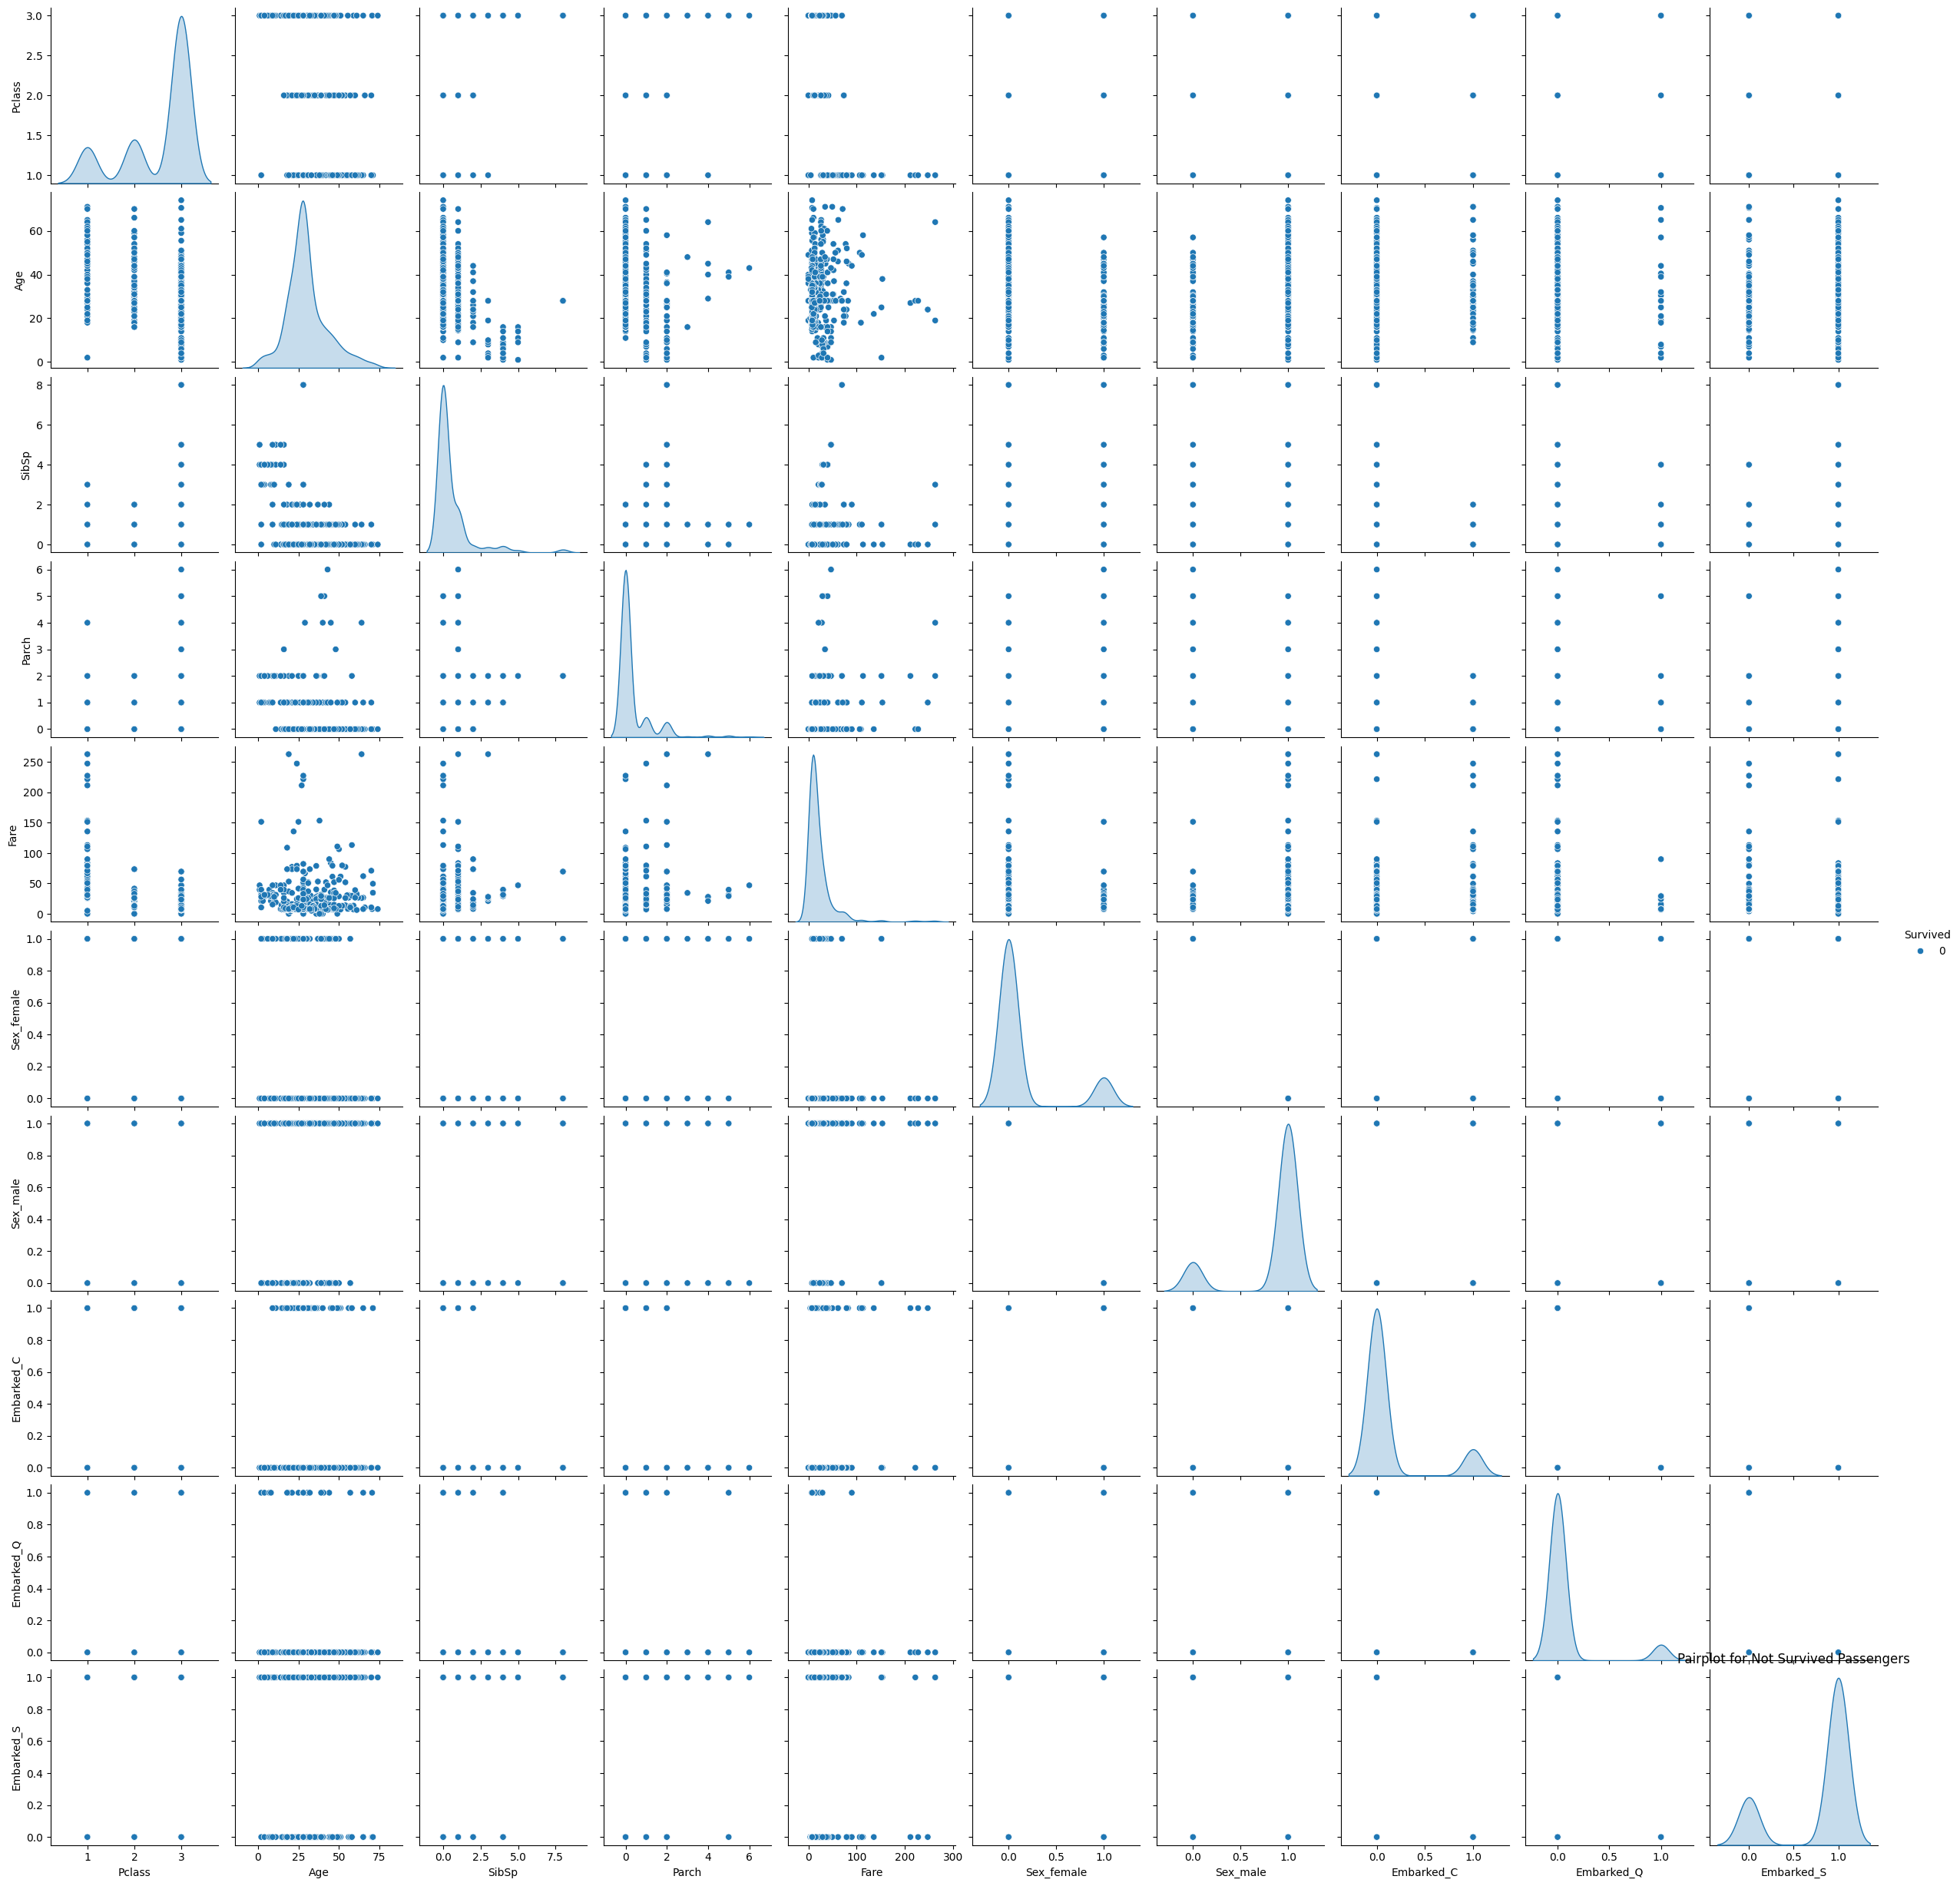

In [18]:
sns.pairplot(df_not_survived, hue='Survived')
plt.title('Pairplot for Not Survived Passengers')
plt.show()